# Classification

## Importing the libraries

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [371]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing the dataset

In [372]:
data = pd.read_excel('Combined_Bergman.xls')
data.pop('Director')
data.pop('Year') # Does not serve as an input variale to the classification models
data.pop('COUNTRY') # Does not serve as an input variale to the classification models

x = data.iloc[: , 1:-1].values # These are the predictor, independent variables (the 1:-1 excludes the first and last columns)
y = data.iloc[: , -1].values # These are the target variables (or classes, in this case)
data.head()

,Film,Pan,Tilt,Pan w. Tilt,Track,Track w. Pan & tilt,Crane,Zoom,Zoom w. Pan & Tilt,Total,...,POV,INS,BCU,CU,MCU,MS,MLS,LS,VLS,BERGMAN
0,10 Things I Hate About You,12,3,6,20,32,18,10,1,102,...,4.0,2.0,64,224,82,37,36,53,3,0
1,"Almost Perfect Affair, An",22,3,14,6,11,1,2,1,60,...,12.0,7.0,70,199,93,51,26,51,9,0
2,"Amityville Horror, The",23,13,29,10,18,1,18,4,116,...,7.0,18.0,138,141,50,34,41,90,6,0
3,Angela's Ashes,21,3,14,9,4,1,0,1,53,...,4.0,10.0,52,152,72,60,68,88,4,0
4,Another Thin Man,41,6,6,15,52,2,0,0,122,...,7.0,4.0,20,137,99,93,84,64,3,0


## Splitting the dataset into the Training set and Test set

In [373]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [374]:
# Print whole matrices 
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [375]:
# print(x_test)

In [376]:
# print(y_test)

# kNN

In [377]:
from sklearn.neighbors import KNeighborsClassifier
#Train Model and Predict
k = 5  
classifierKNN = KNeighborsClassifier(n_neighbors=k)
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier()

In [378]:
y_pred = classifierKNN.predict(x_test)
np.set_printoptions(precision=2)

In [379]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

[[47  4]
 [ 5  8]]
Accuracy: 0.859375
Precision: 0.6666666666666666
Recall: 0.6153846153846154


In [380]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierKNN, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("kNN cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

kNN cross-validation
Accuracy: 84.00 %
Standard deviation: 11.31 %


## Find optimal value for K using error rates and accuracy

Compare the error rates at different values of K

Minimum error:- 0.140625 at K = 2


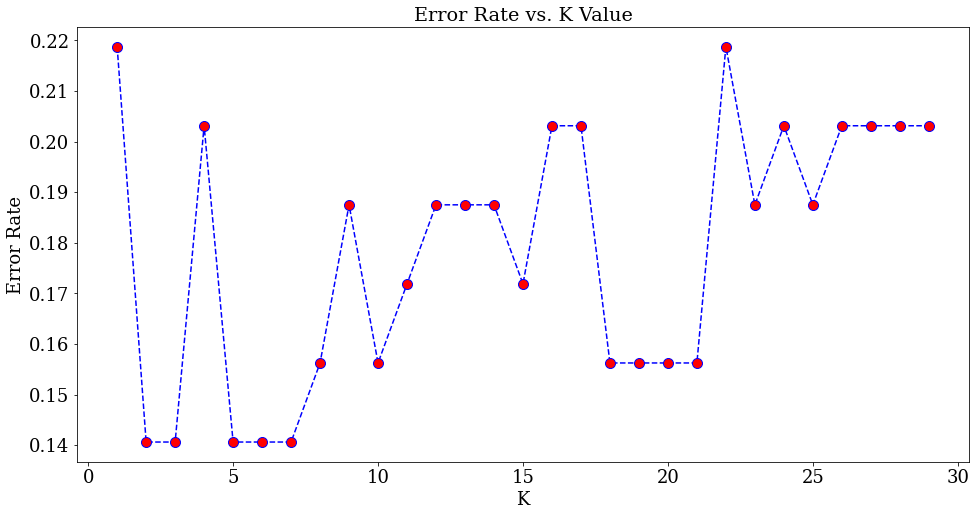

In [381]:
error_rate = []
for i in range(1,30): # 30 is chosen as the maximum number of K as the
                      # training data comprises 264 instances, the square root of which is 16
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(16,8))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 16})

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",1+error_rate.index(min(error_rate)))

Compare the accuracy rates at different values of K

Maximum accuracy:- 0.859375 at K = 2


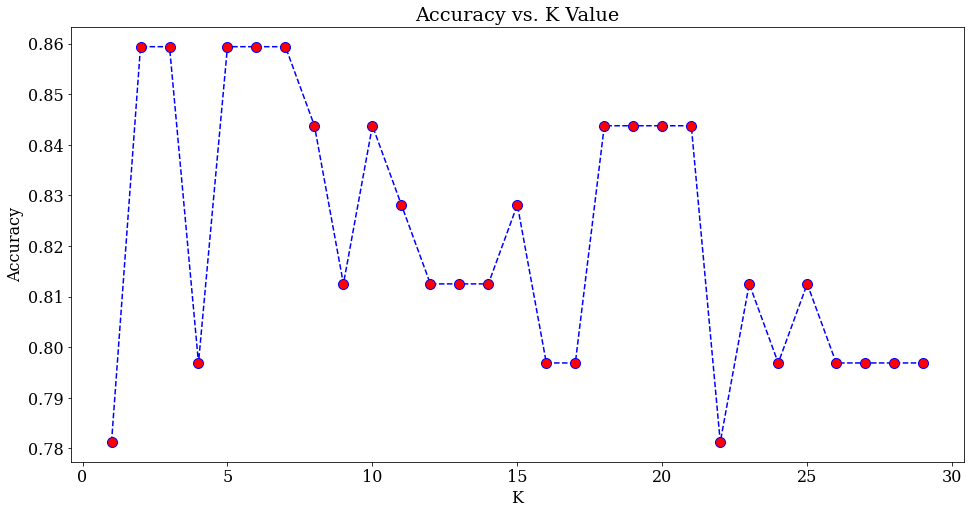

In [382]:
acc = []
# Will take some time
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(16,8))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 16})

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",1+acc.index(max(acc)))

## Find optimal value for K using AUC

Maximum AUC:- 0.8763197586726998 at K = 6


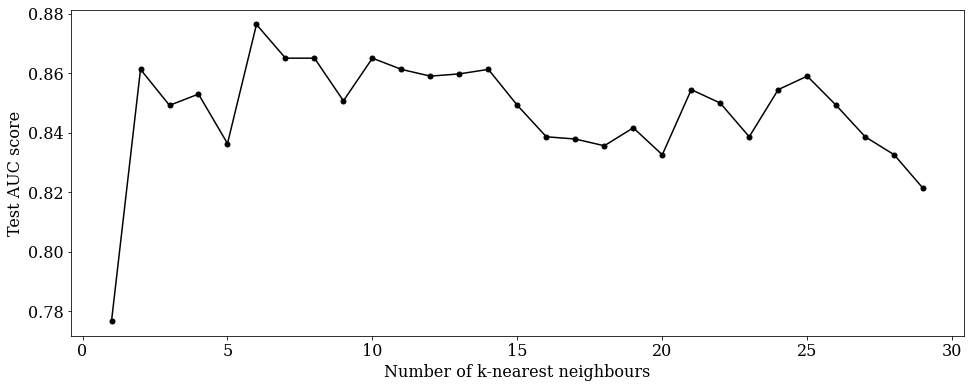

In [383]:
auc_scores = []

from sklearn import metrics
from sklearn.metrics import roc_curve, auc

for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    # Calculate probabilities and determine TPR and FPR
    probs = neigh.predict_proba(x_test)
    # Reading probability of second class (non-Bergman)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    
f = plt.figure(figsize=(16,6))
plt.plot(range(1,30), auc_scores, color = 'black',linestyle='solid', 
         marker='.',markerfacecolor='black', markersize=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 18})

# plt.title('AUC vs. K-value')
plt.xlabel('Number of k-nearest neighbours')
plt.ylabel('Test AUC score')
print("Maximum AUC:-",max(auc_scores),"at K =",1+auc_scores.index(max(auc_scores)))



In [384]:
f.savefig("kNN_2.pdf", bbox_inches='tight')

## SVM Hyperparameter tuning

In [385]:
from sklearn.svm import SVC
classifierSVMrbf = SVC(kernel='rbf') # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
classifierSVMrbf.fit(x_train, y_train)

SVC()

In [386]:
y_pred = classifierSVMrbf.predict(x_test)

In [387]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('SVC with kernel = rbf')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

SVC with kernel = rbf
[[50  1]
 [ 6  7]]
Accuracy: 0.890625
Precision: 0.875
Recall: 0.5384615384615384


In [388]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierSVMrbf, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("SVC with kernel = rbf cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

SVC with kernel = rbf cross-validation
Accuracy: 81.89 %
Standard deviation: 9.91 %


In [389]:
from sklearn.model_selection import GridSearchCV
parameters = [ # 'Parameter' and then the [test values] (0.25 = strong regularization = less overfitting)
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
              # gamma can only be tuned in rbf, poly and sigmoid, so that's why there are two {dictionaries}
grid_search = GridSearchCV(estimator = classifierSVMrbf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, # 10-fold cross validation
                           n_jobs = -1) # if you are running the code on your machine, this will allocate all the processors to running the code
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("SVC with grid search cross-validation")
print("Best accuracy: {:.2f} %".format(best_accuracy*100)) # Format: float with two decimals
print("Best parameters:", best_parameters)

SVC with grid search cross-validation
Best accuracy: 76.67 %
Best parameters: {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}


# Logistic Regression

In [390]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression()
classifierLR.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [391]:
y_pred = classifierLR.predict(x_test)
np.set_printoptions(precision=2) # Specify the number of decimals if not a binary target variable
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # Col 1 = predictions, Col 2 = actual values

In [392]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

[[48  3]
 [ 3 10]]
Accuracy: 0.90625
Precision: 0.7692307692307693
Recall: 0.7692307692307693


In [393]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierLR, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Logistic regression cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic regression cross-validation
Accuracy: 85.89 %
Standard deviation: 14.02 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [394]:
from sklearn.model_selection import GridSearchCV
parameters = [ # 'Parameter' and then the [test values] (0.25 = strong regularization = less overfitting)
              {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]
              # gamma can only be tuned in rbf, poly and sigmoid, so that's why there are two {dictionaries}
grid_search = GridSearchCV(estimator = classifierLR,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, # 10-fold cross validation
                           n_jobs = -1) # if you are running the code on your machine, this will allocate all the processors to running the code
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("LR with grid search cross-validation")
print("Best accuracy: {:.2f} %".format(best_accuracy*100)) # Format: float with two decimals
print("Best parameters:", best_parameters)

LR with grid search cross-validation
Best accuracy: 88.89 %
Best parameters: {'C': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Decision tree

In [395]:
from sklearn.tree import DecisionTreeClassifier
classifierTree = DecisionTreeClassifier(criterion='entropy') # Default is gini
classifierTree.fit(x_train, y_train)

y_pred = classifierTree.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Decision trees')
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Decision trees
[[45  6]
 [ 0 13]]
Accuracy: 0.90625
Precision: 0.6842105263157895
Recall: 1.0


In [396]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierTree, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("Decision tree cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Decision tree cross-validation
Accuracy: 87.11 %
Standard deviation: 6.48 %


In [397]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['entropy'], 'min_samples_split':[2, 4, 6, 8, 10], 'min_samples_leaf':[2, 4, 6, 8, 10, 12, 14, 16]}]
              
grid_search = GridSearchCV(estimator = classifierTree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, # 10-fold cross validation
                           n_jobs = -1) # if you are running the code on your machine, this will allocate all the processors to running the code
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("LR with grid search cross-validation")
print("Best accuracy: {:.2f} %".format(best_accuracy*100)) # Format: float with two decimals
print("Best parameters:", best_parameters)

LR with grid search cross-validation
Best accuracy: 91.33 %
Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 6, 'min_samples_split': 2}
